# Figure 7: Setting cutoffs

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

Using TensorFlow backend.


## IMPORTS AND SETUP

In [4]:
from statsmodels.stats.descriptivestats import sign_test
from matplotlib_venn import venn3, venn3_circles


In [5]:
PROJECT = "/projects/b1080/eks/polyadenylation"
DATADIR = os.path.join(PROJECT, "manuscripts", "01_development", "data")
RESDIR  = os.path.join(PROJECT, "manuscripts", "01_development", "analysis", "resources")
OUTDIR  = os.path.join(PROJECT, "manuscripts", "01_development", "figures", "Figure_07")
os.makedirs(OUTDIR, exist_ok = True)


In [6]:
with open(os.path.join(RESDIR, 'shulman_elkon_pasqtls.fixed_pas.split.wide.pickle'), mode = 'rb') as handle:
    pas_qtls_wide = pickle.load(handle)

sel_effects = ['disruptedAATAAA_noATTAAA','noAATAAA_disruptedATTAAA','noAATAAA_createdATTAAA','createdAATAAA_noATTAAA']
pas_qtls_filt = pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'].isin(sel_effects)].copy()
print(pas_qtls_wide.shape)
print(pas_qtls_filt.shape)
                                  

(330, 26)
(266, 26)


## Benchmarking predictions using *Shulman and Elkon (2020)* PAS pA-QTLs

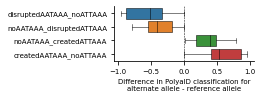

Corresponding metrics:
AATAAA disruption: 1.504632769052528e-36
ATTAAA disruption: 9.094947017729282e-13
ATTAAA creation  : 9.313225746154785e-10
AATAAA creation  : 1.0587911840678754e-22

Creation vs disruption: RanksumsResult(statistic=-13.78201074679305, pvalue=3.2703473563849738e-43)


,count,mean,std,min,25%,50%,75%,max
effectPAS.v2,,,,,,,,
disruptedAATAAA_noATTAAA,120.0,-0.564108,0.297274,-0.966040,-0.882017,-0.514519,-0.335224,-0.001273
noAATAAA_disruptedATTAAA,41.0,-0.380144,0.225454,-0.788091,-0.543207,-0.416505,-0.183811,-0.000180
noAATAAA_createdATTAAA,31.0,0.365999,0.218590,0.011450,0.181071,0.397147,0.493923,0.790438
createdAATAAA_noATTAAA,74.0,0.580633,0.281366,0.004171,0.407391,0.529996,0.867029,0.963753


In [7]:
fig,ax = plt.subplots(1,1, figsize = (2.5,1))

sns.boxplot(data = pas_qtls_filt, y = 'effectPAS.v2', x = 'delta.our-models_classification',
            boxprops = {'edgecolor' : 'black', 'linewidth' : 0.5},
            medianprops = {'color' : 'black', 'linewidth' : 0.5},
            whiskerprops = {'color' : 'black', 'linewidth' : 0.5},
            capprops = {'color' : 'black', 'linewidth' : 0.5},
            flierprops = {'color' : 'black', 'markersize' : 1}, showfliers = True, 
            ax = ax)

ax.axvline(x = 0, color = 'black', linestyle = 'dashed', linewidth = 0.5)

ax.set_xlabel("Difference in PolyaID classification for\nalternate allele - reference allele")
ax.set_ylabel("")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'benchmark.shulman.delta-classification_by_paseffectv2.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


print("Corresponding metrics:")
print("AATAAA disruption:", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'disruptedAATAAA_noATTAAA', 'delta.our-models_classification'], mu0 = 0)[1])
print("ATTAAA disruption:", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'noAATAAA_disruptedATTAAA', 'delta.our-models_classification'], mu0 = 0)[1])
print("ATTAAA creation  :", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'noAATAAA_createdATTAAA', 'delta.our-models_classification'], mu0 = 0)[1])
print("AATAAA creation  :", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'createdAATAAA_noATTAAA', 'delta.our-models_classification'], mu0 = 0)[1])

print("\nCreation vs disruption:", st.ranksums(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'].isin(['disruptedAATAAA_noATTAAA','noAATAAA_disruptedATTAAA']), 'delta.our-models_classification'].tolist(),
                                               pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'].isin(['createdAATAAA_noATTAAA','noAATAAA_createdATTAAA']), 'delta.our-models_classification'].tolist()))

pas_qtls_filt.groupby('effectPAS.v2')['delta.our-models_classification'].describe().sort_values('mean')


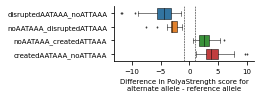

Corresponding metrics:
AATAAA disruption: 1.504632769052528e-36
ATTAAA disruption: 9.094947017729282e-13
ATTAAA creation  : 9.313225746154785e-10
AATAAA creation  : 1.0587911840678754e-22
Creation vs disruption: RanksumsResult(statistic=-13.78201074679305, pvalue=3.2703473563849738e-43)


,count,mean,std,min,25%,50%,75%,max
effectPAS.v2,,,,,,,,
disruptedAATAAA_noATTAAA,120.0,-4.578257,1.906874,-12.015402,-5.559290,-4.425012,-3.195644,-1.497671
noAATAAA_disruptedATTAAA,41.0,-2.824311,1.183530,-7.550845,-3.236813,-2.959714,-2.087759,-1.209639
noAATAAA_createdATTAAA,31.0,2.685017,1.368420,0.721003,1.696499,2.512479,3.423157,6.117111
createdAATAAA_noATTAAA,74.0,4.138069,1.705727,1.130106,2.941942,3.858060,4.942900,10.139533


In [8]:
fig,ax = plt.subplots(1,1, figsize = (2.5,1))

sns.boxplot(data = pas_qtls_filt, y = 'effectPAS.v2', x = 'delta.our-models_strength',
            boxprops = {'edgecolor' : 'black', 'linewidth' : 0.5},
            medianprops = {'color' : 'black', 'linewidth' : 0.5},
            whiskerprops = {'color' : 'black', 'linewidth' : 0.5},
            capprops = {'color' : 'black', 'linewidth' : 0.5},
            flierprops = {'color' : 'black', 'markersize' : 1}, showfliers = True, 
            ax = ax)

ax.axvline(x = -1, color = 'black', linestyle = 'dashed', linewidth = 0.5)
ax.axvline(x = +1, color = 'black', linestyle = 'dashed', linewidth = 0.5)

ax.set_xlabel("Difference in PolyaStrength score for\nalternate allele - reference allele")
ax.set_ylabel("")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'benchmark.shulman.delta-strength_by_paseffectv2.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


print("Corresponding metrics:")
print("AATAAA disruption:", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'disruptedAATAAA_noATTAAA', 'delta.our-models_strength'], mu0 = 0)[1])
print("ATTAAA disruption:", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'noAATAAA_disruptedATTAAA', 'delta.our-models_strength'], mu0 = 0)[1])
print("ATTAAA creation  :", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'noAATAAA_createdATTAAA', 'delta.our-models_strength'], mu0 = 0)[1])
print("AATAAA creation  :", sign_test(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'] == 'createdAATAAA_noATTAAA', 'delta.our-models_strength'], mu0 = 0)[1])

print("Creation vs disruption:", st.ranksums(pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'].isin(['disruptedAATAAA_noATTAAA','noAATAAA_disruptedATTAAA']), 'delta.our-models_strength'].tolist(),
                                             pas_qtls_wide.loc[pas_qtls_wide['effectPAS.v2'].isin(['createdAATAAA_noATTAAA','noAATAAA_createdATTAAA']), 'delta.our-models_strength'].tolist()))

pas_qtls_filt.groupby('effectPAS.v2')['delta.our-models_strength'].describe().sort_values('mean')


## Setting variant effect thresholds using *Shulman and Elkon (2020)* PAS pA-QTLs

In [9]:
thresh_class = 0.9
thresh_strength = -9
thresh_strengthprob = (2 ** thresh_strength) / (1 + (2 ** thresh_strength))
thresh_delta = 1

condCLASS    = (pas_qtls_wide['our-models_classification.REF'] >= thresh_class) | (pas_qtls_wide['our-models_classification.ALT'] >= thresh_class)
condSTRENGTH = (pas_qtls_wide['our-models_strength.REF'] >= thresh_strength) | (pas_qtls_wide['our-models_strength.ALT'] >= thresh_strength)
condDELTA    = (np.abs(pas_qtls_wide['delta.our-models_strength']) >= thresh_delta)
condCOMB     = (condCLASS & condSTRENGTH & condDELTA)

pas_qtls_wide['condCLASS']    = condCLASS
pas_qtls_wide['condSTRENGTH'] = condSTRENGTH
pas_qtls_wide['condDELTA']    = condDELTA
pas_qtls_wide['condCOMB']     = condCOMB

print(f"PolyaID classification >= {thresh_class:.02f}:\t\t{condCLASS.sum()}\t{condCLASS.sum()/len(condCLASS):.01%}")
print(f"PolyaID strength >= {thresh_strength:.02f} ({thresh_strengthprob:.02%}):\t{condSTRENGTH.sum()}\t{condSTRENGTH.sum()/len(condSTRENGTH):.01%}")
print(f"PolyaID delta strength >= {thresh_delta:.02f}:\t\t{condDELTA.sum()}\t{condDELTA.sum()/len(condDELTA):.01%}")
print(f"\nCombined criteria:\t\t\t{condCOMB.sum()}\t{condCOMB.sum()/len(condCOMB):.01%}")


PolyaID classification >= 0.90:		256	77.6%
PolyaID strength >= -9.00 (0.19%):	328	99.4%
PolyaID delta strength >= 1.00:		299	90.6%

Combined criteria:			228	69.1%



Group counts (CSD): {'100': 10, '010': 14, '110': 37, '001': 11, '101': 11, '011': 79, '111': 238}


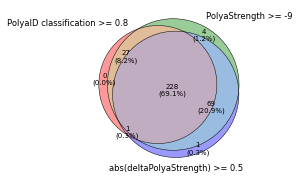

In [10]:
fig,ax = plt.subplots(1,1, figsize = (3,3))

counts = {
    '100' : (( condCLASS) & (~condSTRENGTH) & (~condDELTA)).sum() + 10,
    '010' : ((~condCLASS) & ( condSTRENGTH) & (~condDELTA)).sum() + 10,
    '110' : (( condCLASS) & ( condSTRENGTH) & (~condDELTA)).sum() + 10,
    '001' : ((~condCLASS) & (~condSTRENGTH) & ( condDELTA)).sum() + 10,
    '101' : (( condCLASS) & (~condSTRENGTH) & ( condDELTA)).sum() + 10,
    '011' : ((~condCLASS) & ( condSTRENGTH) & ( condDELTA)).sum() + 10,
    '111' : (( condCLASS) & ( condSTRENGTH) & ( condDELTA)).sum() + 10,
}

print("\nGroup counts (CSD):", counts)

venn3(subsets = counts, set_labels = ['PolyaID classification >= 0.8', 'PolyaStrength >= -9', 'abs(deltaPolyaStrength) >= 0.5'],
      subset_label_formatter = lambda x: f"{x-10}\n({((x-10)/len(pas_qtls_wide)):.01%})")
venn3_circles(subsets = counts, linestyle = 'solid', linewidth = 0.5, color = "black")

plt.savefig(os.path.join(OUTDIR, 'benchmark_pasqtls.choosing_cutoffs.pie.plus_pseudo.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


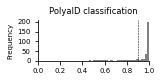

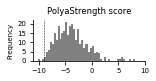

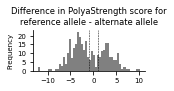

In [12]:
fig,ax = plt.subplots(1,1, figsize = (2,0.75))
ax.hist(pas_qtls_wide[['our-models_classification.REF','our-models_classification.ALT']].to_numpy().max(axis = 1), color = 'gray', bins = 50)
ax.axvline(x = thresh_class, color = 'black', linestyle = 'dashed', linewidth = 0.5, zorder = 4)
ax.set_ylabel("Frequency")
ax.set_title("PolyaID classification")
ax.set_xlim(0,1)
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(os.path.join(OUTDIR, 'benchmark_pasqtls.choosing_cutoffs.individual_class.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()

fig,ax = plt.subplots(1,1, figsize = (2,0.75))
ax.hist(pas_qtls_wide[['our-models_strength.REF','our-models_strength.ALT']].to_numpy().max(axis = 1), color = 'gray', bins = 50)
ax.axvline(x = thresh_strength, color = 'black', linestyle = 'dashed', linewidth = 0.5, zorder = 4)
ax.set_ylabel("Frequency")
ax.set_title("PolyaStrength score")
ax.set_xlim(-11,10)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(os.path.join(OUTDIR, 'benchmark_pasqtls.choosing_cutoffs.individual_strength.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()

fig,ax = plt.subplots(1,1, figsize = (2,0.75))
ax.hist(pas_qtls_wide['delta.our-models_strength'], color = 'gray', bins = 50)
ax.axvline(x = -thresh_delta, color = 'black', linestyle = 'dashed', linewidth = 0.5, zorder = 4)
ax.axvline(x = +thresh_delta, color = 'black', linestyle = 'dashed', linewidth = 0.5, zorder = 4)
ax.set_ylabel("Frequency")
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_title("Difference in PolyaStrength score for\nreference allele - alternate allele")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(os.path.join(OUTDIR, 'benchmark_pasqtls.choosing_cutoffs.individual_delta.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()
